In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:04<00:00, 242MB/s]
100% 1.06G/1.06G [00:04<00:00, 262MB/s]


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip install sequential

  Preparing metadata (setup.py) ... done
  Created wheel for sequential: filename=sequential-1.0.0-py3-none-any.whl size=2859 sha256=3d4e41556ba7daa090fecddb414d0c8030262f07993f9e2f0405a09309962d94
  Stored in directory: /root/.cache/pip/wheels/c3/61/56/fe456787532527aafb108ffeceecb4a2e928a518c88bbdd5c5
Successfully built sequential


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [8]:
#GENERATORS ARE USED TO PROCESS LARGE AMOUNT OF DATA IN BATCHES SO AS TO AVOID EXHAUSTING THE RAM CAPACITY
train_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',#So as to set 0 for cats and 1 for dogs
    label_mode='int',
    batch_size=32,
    image_size=(256,256)#Defining size of each image


)
validation_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',#So as to set 0 for cats and 1 for dogs
    label_mode='int',
    batch_size=32,
    image_size=(256,256)#Defining size of each image


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#TO KEEP VALUES FROM 0 TO 1 FOR BETTER NEURAL NETWORK
def div(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label
train_dataset=train_dataset.map(div)
validation_dataset=validation_dataset.map(div)

# MODEL BUILDING

In [10]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

# Model Compilation

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [13]:
hist=model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 72s 90ms/step - loss: 0.6815 - accuracy: 0.5745 - val_loss: 0.6132 - val_accuracy: 0.6704
Epoch 2/10
625/625 [==============================] - 55s 88ms/step - loss: 0.5617 - accuracy: 0.7145 - val_loss: 0.5027 - val_accuracy: 0.7592
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.4344 - accuracy: 0.7956 - val_loss: 0.5126 - val_accuracy: 0.7704
Epoch 4/10
625/625 [==============================] - 54s 85ms/step - loss: 0.2833 - accuracy: 0.8774 - val_loss: 0.6027 - val_accuracy: 0.7794
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1415 - accuracy: 0.9439 - val_loss: 0.9682 - val_accuracy: 0.7610
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0839 - accuracy: 0.9714 - val_loss: 0.9956 - val_accuracy: 0.7656
Epoch 7/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 1.4579 - val_accuracy:

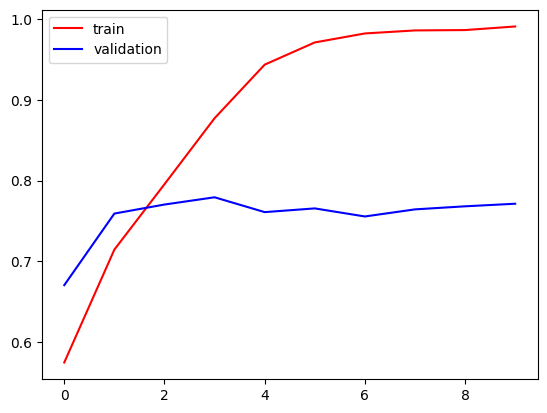

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'],color='red',label='train')
plt.plot(hist.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import cv2

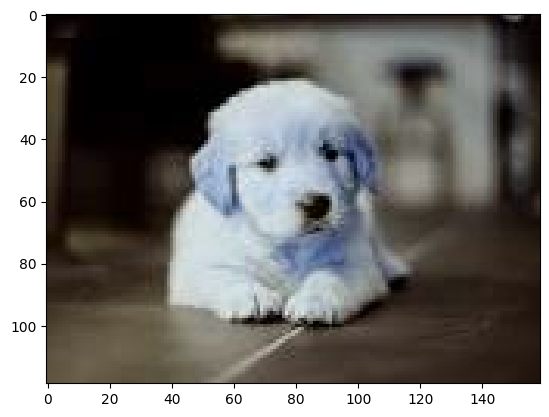

In [26]:

test=cv2.imread('/content/download (1).jpg')
plt.imshow(test)


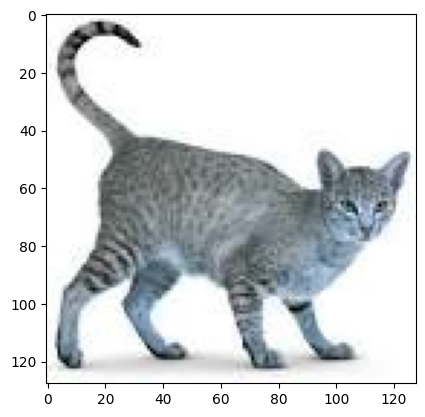

In [24]:
test=cv2.imread('/content/download.jpg')
plt.imshow(test)

In [27]:
test=cv2.resize(test,(256,256))
test=test.reshape((1,256,256,3))
model.predict(test)

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)